<a href="https://colab.research.google.com/github/SevillaBK/Tensorflow2.0/blob/master/Chapter_6_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컨볼루션 신경망의 성능을 높이기 위해서 사용되는 방법에 대해 알아보겠습니다.<br/>
대표적으로 쓰이는 두 방법은 **레이어 많이 쌓기**와 **이미지 보강(Image Augmentation)**입니다.

# 1. 더 많은 레이어 쌓기

딥러닝에서 네트워크의 구조를 깊게 쌓는 것이 가능해진 후 컨볼루션 신경망에서는 컨볼루션 레이어가<br/>
중첩된 더 깊은 구조가 계속해서 나타났고, 그 때마다 퍼포먼스가 개선되었습니다.

아래에서는 깊은 컨볼루션 레이어를 쌓는 방법 중 하나인 **VGGNet**의 스타일의 신경망으로<br/>
Fashion MNIST 데이터셋에 적용해보겠습니다.

In [1]:
# 텐서플로 불러오기
import tensorflow as tf

# Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# 데이터 스케일링
train_X = train_X / 255.0
test_X = test_X / 255.0

# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [2]:
# VGGNet 스타일의 콘볼루션 신경망 모델
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

VGGNet은 여러 구조로 실험했는데 그 중 19개의 레이어가 겹쳐진 VGG-19가 제일 깊은 구조입니다.<br/>
VGG-19는 초반에 컨볼루션 레이어를 2개 겹친 뒤 풀링레이어 1개를 사용하는 패턴을 2차례,<br/>
그 후 컨볼루션 레이어를 4개 겹친 뒤 풀링 레이어를 1개 사용하는 패턴을 3차례 반복합니다.

![alt text](https://github.com/injo-image/image/blob/master/tensorflow/chapter6/VGG-19.png?raw=true)

이번에 사용한 모델은 이미지가 작기도 하고, 연산 능력의 효율 상 간략하게 사용했습니다.<br/>
사용된 컨볼루션 레이어와 Dense 레이어의 개수를 세면 VGG-7 정도라 할 수 있습니다.

Epoch 1/25
1407/1407 [==============================] - 15s 11ms/step - loss: 0.5825 - accuracy: 0.7878 - val_loss: 0.3300 - val_accuracy: 0.8752
Epoch 2/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3703 - accuracy: 0.8679 - val_loss: 0.2836 - val_accuracy: 0.8963
Epoch 3/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3247 - accuracy: 0.8817 - val_loss: 0.2539 - val_accuracy: 0.9079
Epoch 4/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3064 - accuracy: 0.8897 - val_loss: 0.2432 - val_accuracy: 0.9090
Epoch 5/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2879 - accuracy: 0.8968 - val_loss: 0.2398 - val_accuracy: 0.9099
Epoch 6/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2787 - accuracy: 0.8987 - val_loss: 0.2275 - val_accuracy: 0.9163
Epoch 7/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2694 - accuracy: 0.9017 - val_loss: 0.2231 -

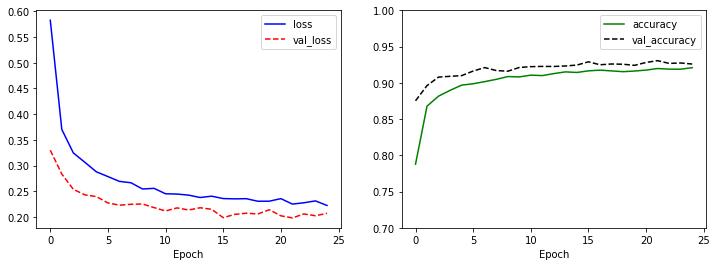

[0.22648681700229645, 0.9218000173568726]

In [3]:
# VGGNet 스타일의 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

시각화된 학습결과를 보니 val_loss가 증가하는 현상이 나타나지 않습니다. 아직 과적합되지 않아 에포크 수를 더 늘릴 수 있을 것 같습니다.<br/>
테스트 데이터에 대한 분류 정확도도 93%로 꽤 높게 나왔습니다.

# 2. 이미지 보강

**이미지보강(Image Augmentation)**은 훈련 데이터 이미지를 기반으로 변형된 이미지 데이터를 새롭게 만들어 훈련 데이터를 보강하는 것입니다.<br/>

텐서플로에서는 **ImageDataGenerator**를 활용하여 이미지 보강을 할 수 있습니다.

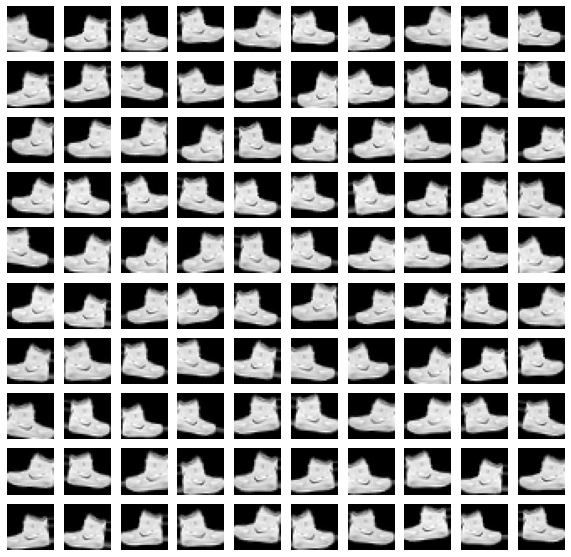

In [4]:
# ImageDataGenerator를 활용한 이미지 보강 및 보강된 이미지 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1),
                                   np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for c in range(100):
  plt.subplot(10,10,c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

위의 코드에서 np.tile(A, reps)은 A를 reps에 정해진 형긱만큼 반복한 값을 반환합니다. 이번 예시의 경우 reps가 100이기 때문에 A를 100번 반복한 값을 반환합니다.

코드 실행 결과, 신발 이미지가 여러 형태로 조금씩 변형된 것을 확인할 수 있습니다.

## ImageDataGenerator 함수의 인자

* `rescale` : 이미지의 픽셀 값 조정
* `rotation_range` : 이미지 회전
* `width_shift_range` : 가로방향 이동
* `height_shift_range` : 세로방향 이동
* `zoom_range` : 이미지 확대
* `shear_range` : 이미지 굴절
* `horizontal_flip` : 횡방향 이미지 반전
* `vertical_flip` : 종방향 이미지 반전
* `fill_mode` : 이미지를 이동 굴절시켰을 때 빈 픽셀값을 채우는 방식

이번 예제의 경우에는 이미지를 종방향으로 반전시키는 vertical_flip을 사용하지는 않았습니다. Fashion MNIST에는 보통 이미지가 반듯하게 되어있기 때문에 뒤집는 것이 크게 도움이 되지 않습니다.

`flow()` 함수는 실제로 보강된 이미지를 생성합니다. 이 함수는 iterator라는 객체를 만드는데 이 객체로부터 next() 함수를 이용하여 값을 순차적으로 꺼낼 수 있습니다.

augment_size를 100으로 설정했기 때문에 next() 함수로 꺼내는 이미지도 100장입니다. 

이번에는 실제로 훈련 이미지 데이터를 보강하여 학습에 이용해보겠습니다.

In [5]:
# Image Augmentation
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0],size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 X_train에 보강된 이미지인 x_augmented를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


먼저 훈련 데이터의 50%인 30,000개의 이미지를 추가하기 위해 augment_size = 30,000 으로 설정했습니다.<br/>
변형할 원본 이미지를 찾기 위해 np.random.randint() 함수로 0~59,999 범위의 정수 중에서 30,000개를 뽑았습니다.<br/>
이 때, 중복되는 것을 원하지 않는다면 np.random.randint() 대신<br/>np.random.choice() 함수를 사용하고 replace 인수를 False로 설정하면 됩니다.<br/><br/>
train_X[randidx]로 임의로 추출된 이미지를 선택하고 원본에 영향을 주지 않기 위해 copy() 함수로 복사본을 만들어줍니다.<br/><br/>
그리고 ImageDataGenerator의 flow() 함수로 30,000개의 새로운 이미지 데이터를 생성하고,<br/>
np.concatenate() 함수로 훈련 데이터에 보강이미지를 추가합니다.

Epoch 1/25
2110/2110 [==============================] - 22s 11ms/step - loss: 0.5660 - accuracy: 0.7950 - val_loss: 0.5792 - val_accuracy: 0.7786
Epoch 2/25
2110/2110 [==============================] - 22s 10ms/step - loss: 0.3811 - accuracy: 0.8626 - val_loss: 0.5248 - val_accuracy: 0.8081
Epoch 3/25
2110/2110 [==============================] - 22s 10ms/step - loss: 0.3381 - accuracy: 0.8779 - val_loss: 0.4692 - val_accuracy: 0.8205
Epoch 4/25
2110/2110 [==============================] - 22s 10ms/step - loss: 0.3187 - accuracy: 0.8863 - val_loss: 0.4676 - val_accuracy: 0.8211
Epoch 5/25
2110/2110 [==============================] - 22s 10ms/step - loss: 0.3043 - accuracy: 0.8918 - val_loss: 0.4304 - val_accuracy: 0.8404
Epoch 6/25
2110/2110 [==============================] - 22s 11ms/step - loss: 0.2939 - accuracy: 0.8952 - val_loss: 0.4204 - val_accuracy: 0.8396
Epoch 7/25
2110/2110 [==============================] - 22s 11ms/step - loss: 0.2871 - accuracy: 0.8971 - val_loss: 0.3979 -

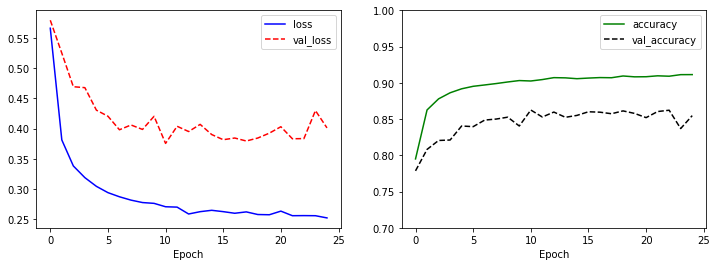

[0.22369050979614258, 0.9205999970436096]

In [6]:
# VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

테스트 데이터에 대한 데이터는 92%입니다. 아직은 에포크를 더 늘리면 val_loss나 val_accuracy가 더 개선될 수 있을 것 같습니다.